# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

# Loading the Datasets

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Summary Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


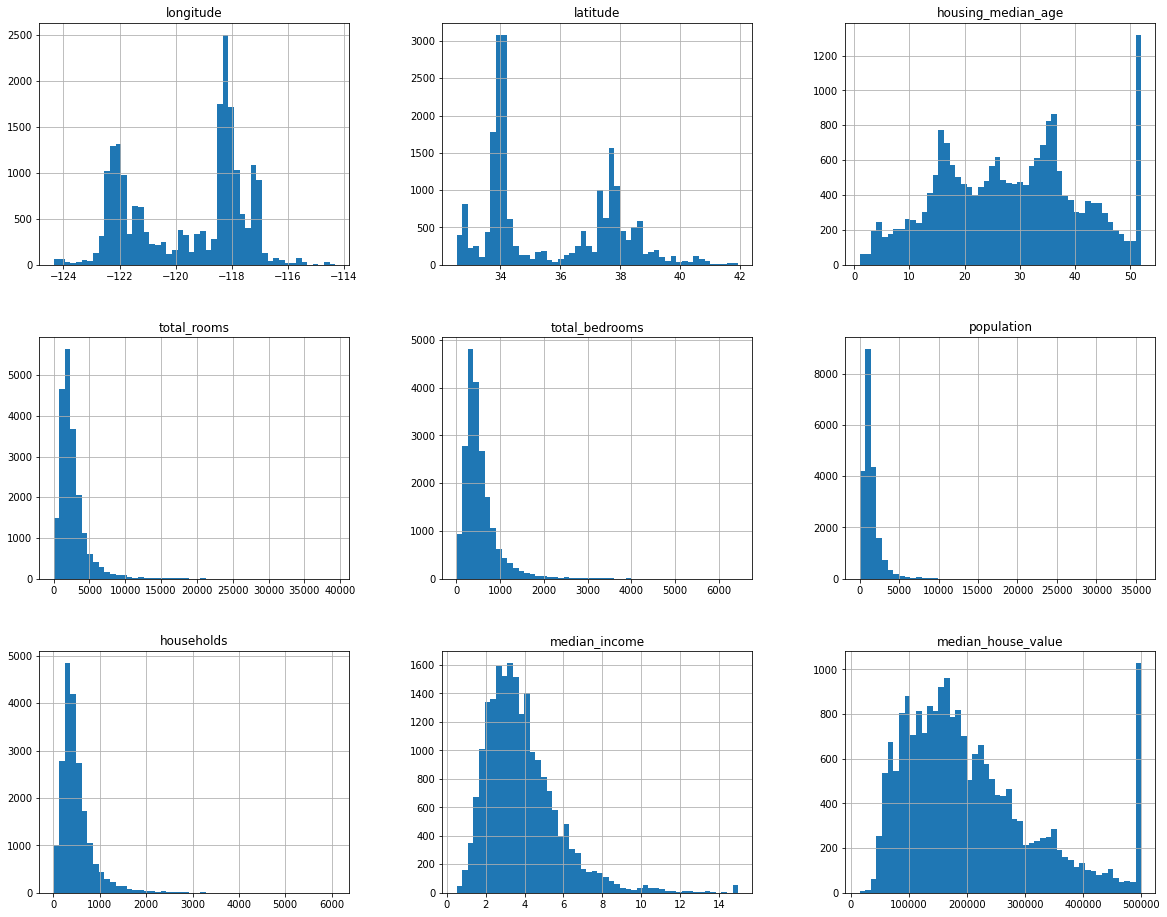

In [8]:
df.hist(bins = 50, figsize = (20, 16))
plt.show()

# Creating Train and Test Sets

## Stratified Sampling

In [9]:
df['income_category'] = pd.cut(df['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])

In [10]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 21)
for train_index, test_index in split.split(df, df['income_category']):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

In [11]:
for i in (strat_train, strat_test):
    i.drop('income_category', axis = 1, inplace = True)

# Data Visualization

In [74]:
housing = strat_train.copy()
housing_test = strat_test.copy()

## Geographical Plot

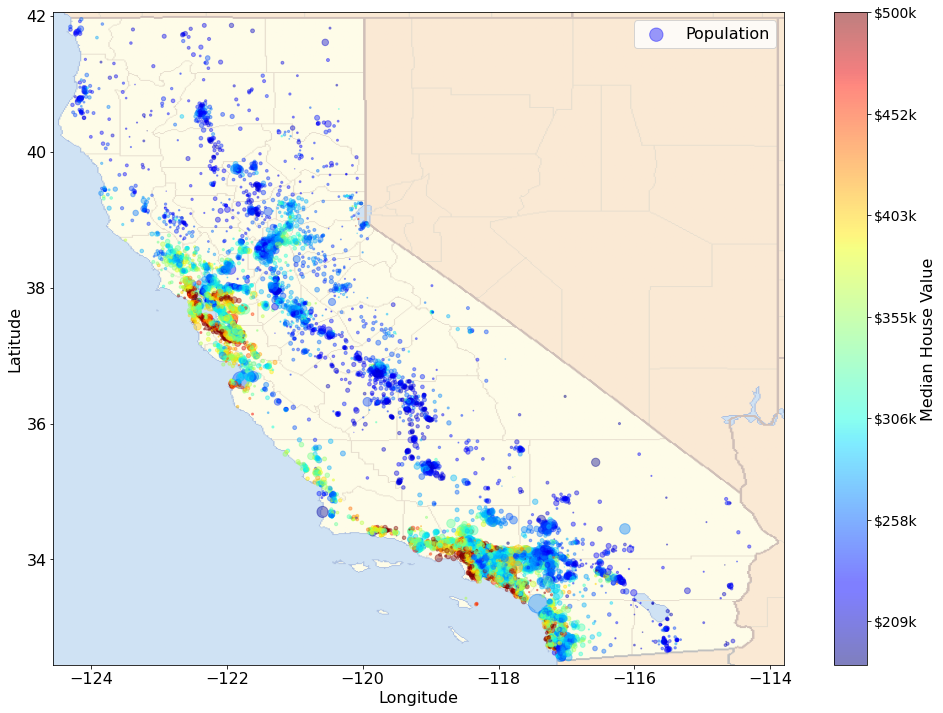

In [13]:
import matplotlib.image as mpimg
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.4, 
    s = housing['population']/100, label = 'Population',figsize = (18, 12), 
    c = housing['median_house_value'], cmap = plt.get_cmap('jet'), colorbar=False, sharex = False)
plt.legend(fontsize=16)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
image = mpimg.imread('california.png')
plt.imshow(image, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap('jet'))
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)
plt.show()

## Correlation Plots

In [14]:
corr = housing.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688686
total_rooms           0.128371
housing_median_age    0.101581
households            0.057276
total_bedrooms        0.041577
population           -0.033884
longitude            -0.050563
latitude             -0.139373
Name: median_house_value, dtype: float64

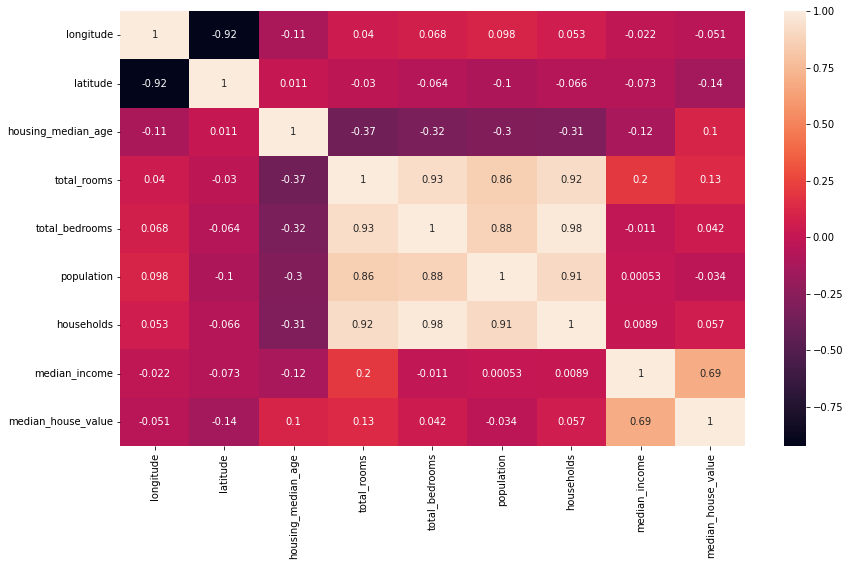

In [15]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [16]:
from pandas.plotting import scatter_matrix

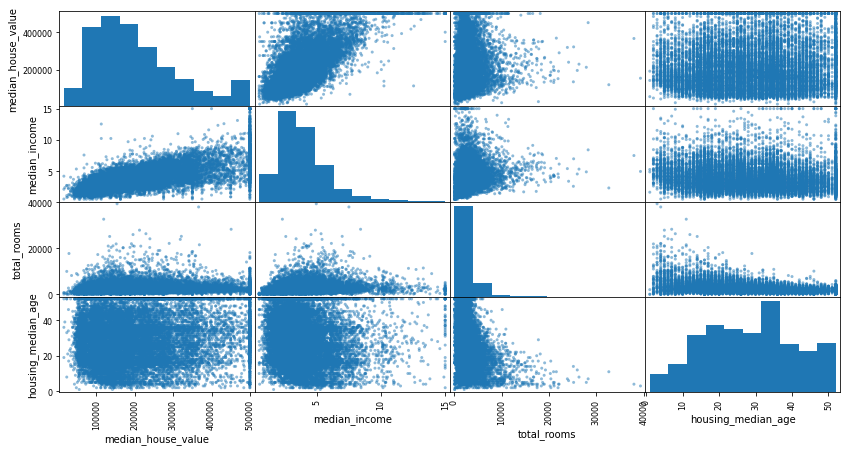

In [17]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (14, 7))
plt.show()

In both the correlation plot and the scatter plot we can see the median house value is strongly correlated with the median income attribute. 

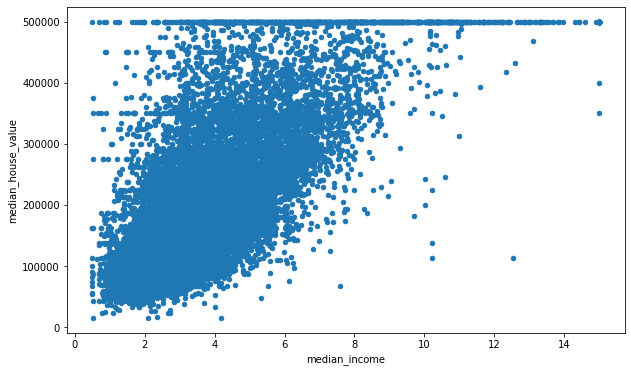

In [18]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', figsize = (10, 6))
plt.show()

We can a straight line at 500000, 450000, 350000 and a few others. It may be necessary to remove these before feeding the training set into an algorithm. This because these data inconsistencies could impact model performance. In addition, the line at 500000 is due to a cap.

# Feature Engineering

## Combining Attributes

In [75]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['occupants'] = housing['population']/housing['households']
housing_test['rooms_per_household'] = housing_test['total_rooms']/housing_test['households']
housing_test['bedrooms_per_room'] = housing_test['total_bedrooms']/housing_test['total_rooms']
housing_test['occupants'] = housing_test['population']/housing_test['households']

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,occupants
13641,-117.33,34.05,26.0,613.0,149.0,431.0,130.0,1.3977,73100.0,INLAND,4.715385,0.243067,3.315385
12439,-116.18,33.67,25.0,2888.0,654.0,2940.0,660.0,2.2141,66700.0,INLAND,4.375758,0.226454,4.454545
12218,-117.23,33.57,6.0,13724.0,2269.0,5860.0,1986.0,3.9617,183000.0,<1H OCEAN,6.910373,0.165331,2.950655
8447,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409,256300.0,<1H OCEAN,3.254902,0.310241,1.735294
4843,-118.29,34.03,27.0,1084.0,287.0,1085.0,279.0,2.1350,119600.0,<1H OCEAN,3.885305,0.264760,3.888889


In [21]:
corr2 = housing.corr()
corr2['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688686
rooms_per_household    0.154399
total_rooms            0.128371
housing_median_age     0.101581
households             0.057276
total_bedrooms         0.041577
occupants             -0.026825
population            -0.033884
longitude             -0.050563
latitude              -0.139373
bedrooms_per_room     -0.263780
Name: median_house_value, dtype: float64

Two of the attributes we have created are strongly correlated with the median house value than most of the original attributes and so we can include these in our analysis and in the training process.

In [22]:
predictors = housing.drop('median_house_value', axis = 1)
target = housing['median_house_value'].copy()

# Data Cleaning

## Handling Null Values

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy='median')
predictors_num = predictors.drop('ocean_proximity', axis=1)

In [25]:
imputer.fit(predictors_num)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_ # An array of all the medians of the attributes

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.36000000e+02,  1.16800000e+03,  4.10000000e+02,  3.53440000e+00,
        5.22793363e+00,  2.03074875e-01,  2.81846283e+00])

In [27]:
predictors_num.median().values # Same array as above

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.36000000e+02,  1.16800000e+03,  4.10000000e+02,  3.53440000e+00,
        5.22793363e+00,  2.03074875e-01,  2.81846283e+00])

In [28]:
predictor_tr = imputer.transform(predictors_num)

In [29]:
predictor_tr = pd.DataFrame(predictor_tr, columns = list(predictors_num))

In [30]:
predictor_tr.info() # no null values as required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16512 non-null  float64
 1   latitude             16512 non-null  float64
 2   housing_median_age   16512 non-null  float64
 3   total_rooms          16512 non-null  float64
 4   total_bedrooms       16512 non-null  float64
 5   population           16512 non-null  float64
 6   households           16512 non-null  float64
 7   median_income        16512 non-null  float64
 8   rooms_per_household  16512 non-null  float64
 9   bedrooms_per_room    16512 non-null  float64
 10  occupants            16512 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


## Handling Text & Categorical Attributes

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
op = predictors['ocean_proximity']

In [33]:
op = np.array(predictors['ocean_proximity'])

In [34]:
predictor_tr['ocean_proximity'] = op

In [35]:
predictor_cat = predictor_tr[['ocean_proximity']]

In [36]:
encoder = OneHotEncoder()
predictor_cat_1hot = encoder.fit_transform(predictor_cat)
predictor_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

# Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

# Transformation Pipelines

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [41]:
predictors_num_tr = num_pipeline.fit_transform(predictors_num)
predictors_num_tr = pd.DataFrame(predictors_num_tr, columns=list(predictors_num))

In [42]:
from sklearn.compose import ColumnTransformer

In [43]:
num = list(predictors_num)
cat = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num),
    ('cat', OneHotEncoder(), cat),
])

In [44]:
housing_prepared = full_pipeline.fit_transform(predictors)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(housing_prepared, target)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
predictions = lr.predict(housing_prepared)

In [50]:
mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)

In [51]:
rmse # this error is quite high so we should choose better features or a more powerful model.

67654.80362531952

# Decison Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, target)

DecisionTreeRegressor()

In [54]:
preds = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(target, preds)
tree_rmse = np.sqrt(tree_mse)

In [55]:
tree_rmse

0.0

# Cross-Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
scores = cross_val_score(tree_reg, housing_prepared, target, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print("""Scores:""", scores)
    print("""Mean:""", scores.mean())
    print("""Standard deviation:""", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [72984.02513496 69130.95110604 71940.86627614 72106.27046087
 70556.9069713 ]
Mean: 71343.803989862
Standard deviation: 1352.3378794661837


In [59]:
lin_scores = cross_val_score(lr, housing_prepared, target, scoring = "neg_mean_squared_error", cv=5)
lin_scores_rmse = np.sqrt(-lin_scores)
display_scores(lin_scores_rmse)

Scores: [69696.49273872 67910.24157711 67559.52363497 67881.52954656
 66077.33235837]
Mean: 67825.02397114523
Standard deviation: 1152.1950069573895


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfr = RandomForestRegressor()
rfr.fit(housing_prepared, target)
rf_preds = rfr.predict(housing_prepared)
rf_mse = mean_squared_error(target, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

18593.437944868492

In [62]:
rf_scores = cross_val_score(rfr, housing_prepared, target, scoring="neg_mean_squared_error", cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores: [49717.04669658 50353.10324055 51283.50893373 50975.03403411
 51914.318583  ]
Mean: 50848.60229759349
Standard deviation: 757.2076810033049


The Random Forest model performs the best. However, it also suffers from from overfitting since it performs better on the training set than on the validation set.

# Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [66]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [67]:
cvresults = grid_search.cv_results_

for mean_score, params in zip(cvresults['mean_test_score'], cvresults['params']):
    print(np.sqrt(-mean_score), params)

63112.54537615789 {'max_features': 2, 'n_estimators': 3}
55435.20401032615 {'max_features': 2, 'n_estimators': 10}
52440.414475299 {'max_features': 2, 'n_estimators': 30}
59764.01766161048 {'max_features': 4, 'n_estimators': 3}
52773.59123456891 {'max_features': 4, 'n_estimators': 10}
50286.762189460955 {'max_features': 4, 'n_estimators': 30}
59903.205772503534 {'max_features': 6, 'n_estimators': 3}
51559.063650544755 {'max_features': 6, 'n_estimators': 10}
49943.92468529742 {'max_features': 6, 'n_estimators': 30}
58001.26035627278 {'max_features': 8, 'n_estimators': 3}
52278.341365709595 {'max_features': 8, 'n_estimators': 10}
49860.94170222079 {'max_features': 8, 'n_estimators': 30}
61651.532212800485 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54385.18811074068 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58766.220420318416 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53053.587552293815 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.22189590e-02, 6.48282487e-02, 4.11364185e-02, 1.45929199e-02,
       1.46184777e-02, 1.44180019e-02, 1.38242540e-02, 3.14287904e-01,
       5.88349025e-02, 8.63524344e-02, 1.10266126e-01, 9.53851753e-03,
       1.79875989e-01, 1.42478612e-04, 1.91714778e-03, 3.14721997e-03])

# Evaluating on theTest Set

In [69]:
best_model = grid_search.best_estimator_

In [76]:
X_test_prep = full_pipeline.transform(housing_test)
final_preds = best_model.predict(X_test_prep)
best_mse = mean_squared_error(y_test, final_preds)
best_rmse = np.sqrt(best_mse)

In [77]:
best_rmse

48488.06118037641

## Confidence Level

In [79]:
from scipy import stats
confidence = 0.95
squared_errors = (final_preds - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, # assuming t-distribution
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46248.68297097, 50628.48484317])